
---

### **Task 1 of Mini Project: Text Classification on a Text Dataset using Machine Learning**

## Instructions:
- **Objective:** Perform text classification on a text dataset. You will apply various text processing techniques, generate features, and train machine learning models to classify text into appropriate categories.
- **Dataset:** Based on your mini project title
- **Task Requirements:**
  - Follow the instructions in each section.
  - You will generate various features, train multiple machine learning models, and analyze the results.
  - At the end, provide a detailed analysis of your findings.

---

### **Section 1: Load the Dataset**

```python
# Student Code: Load the dataset
import pandas as pd

# Example: Load your dataset (replace with the actual dataset path or URL)
df = pd.read_csv("path_to_your_text_dataset.csv")

# Display the first few rows to understand the structure
df.head()
```

**Instructions:**
- Load your text dataset into a pandas DataFrame.
- Check the structure of the dataset (columns, data types, etc.) and ensure it contains text and target labels (for classification tasks).

---

### **Section 2: Perform Exploratory Data Analysis (EDA)**

```python
# Student Code: Perform EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Display dataset info and summary statistics
print(df.info())
print(df.describe())

# Visualize the class distribution (if it's a classification task)
sns.countplot(x='target_column', data=df)
plt.title("Class Distribution")
plt.show()

# Check for missing values
print(df.isnull().sum())
```

**Instructions:**
- Perform basic EDA to understand the distribution of the dataset (e.g., number of rows, columns, and data types).
- Visualize the class distribution (if it’s a classification task).
- Check for any missing values in the dataset and handle them appropriately.

---

### **Section 3: Perform Text Processing on Dataset**

```python
# Student Code: Text Processing (Cleaning the data)
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove non-alphabetic characters and lowercase the text
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    return text

# Apply text cleaning to the dataset
df['cleaned_text'] = df['text_column'].apply(clean_text)

# Display cleaned text
df[['text_column', 'cleaned_text']].head()
```

**Instructions:**
- Clean the text by removing non-alphabetic characters and converting all text to lowercase.
- Optionally, remove stopwords (common words like 'the', 'and', etc.) to reduce noise in the text.

---

### **Section 4: Generate NLP-Based Features**

```python
# Student Code: Generate NLP-based features
import numpy as np

def generate_nlp_features(df):
    # Character count
    df['char_count'] = df['cleaned_text'].apply(len)
    # Word count
    df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
    # Average word length
    df['avg_word_length'] = df['cleaned_text'].apply(lambda x: np.mean([len(word) for word in x.split()]))
    # Stopword count
    df['stopword_count'] = df['cleaned_text'].apply(lambda x: len([word for word in x.split() if word in stop_words]))
    # Hashtag count (for datasets like tweets)
    df['htag_count'] = df['cleaned_text'].apply(lambda x: x.count('#'))
    
    return df

# Generate NLP features
df = generate_nlp_features(df)
df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']].head()
```

**Instructions:**
- Generate features based on the text, such as:
  1. **Character count** — Number of characters in the text.
  2. **Word count** — Number of words in the text.
  3. **Average word length** — Average length of words in the text.
  4. **Stopword count** — Number of stopwords in the text.
  5. **Hashtag count** — If applicable (for datasets like tweets).
  
---

### **Section 5: Generate Bag of Words, TFIDF, and FastText Features**

```python
# Student Code: Generate Bag of Words, TFIDF, and FastText features
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import fasttext

# Bag of Words
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'])

# TFIDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# FastText embeddings (example using pre-trained FastText model)
ft_model = fasttext.load_model('cc.en.300.bin')

def get_fasttext_embeddings(text):
    words = text.split()
    word_vectors = [ft_model.get_word_vector(word) for word in words]
    return np.mean(word_vectors, axis=0)

df['fasttext_embeddings'] = df['cleaned_text'].apply(get_fasttext_embeddings)
```

**Instructions:**
- **Bag of Words (BoW):** Use `CountVectorizer` to generate a matrix of word counts from the text.
- **TFIDF:** Use `TfidfVectorizer` to generate a matrix of term frequency-inverse document frequency scores.
- **FastText:** Use pre-trained FastText embeddings to generate word vectors for the text.

---

### **Section 6: Train All Supervised Models on NLP-Based Features**

```python
# Student Code: Train Models on NLP Features (char_count, word_count, etc.)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data
X = df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']]
y = df['target_column']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model (Random Forest as an example)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
```

**Instructions:**
- Train various machine learning models (e.g., Random Forest, SVM, Logistic Regression) on the NLP-based features.
- Compare the performance of the models using accuracy or other metrics.

---

### **Sections 7-9: Train Models on BoW, TFIDF, and FastText Features**

```python
# Train models on Bag of Words (BoW), TFIDF, and FastText features
# Example for Bag of Words
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'BoW Accuracy: {accuracy_score(y_test, y_pred)}')

# Repeat for TFIDF and FastText embeddings
# Example for TFIDF
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'TFIDF Accuracy: {accuracy_score(y_test, y_pred)}')

# Example for FastText embeddings
X_train, X_test, y_train, y_test = train_test_split(np.vstack(df['fasttext_embeddings']), y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'FastText Accuracy: {accuracy_score(y_test, y_pred)}')
```

**Instructions:**
- Train models on Bag of Words, TFIDF, and FastText features separately.
- Evaluate the performance of each model.

---

### **Section 10: Train Models on All Combined Features with TFIDF**

```python
# Student Code: Train Models on Combined Features (NLP + TFIDF)
from scipy.sparse import hstack

# Combine NLP features and TFIDF features
X_combined = hstack([X, X_tfidf])

# Train model and evaluate
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Combined Features Accuracy: {accuracy_score(y_test, y_pred)}')
```

**Instructions:**
- Combine all NLP-based features (e.g., char count, stopword count, etc.) with the TFIDF features.
- Train a model on the combined features and evaluate performance.

---

### **Section 11: Save the Model and Make Predictions on Real-World Input**

```python
# Student Code: Save the model and make predictions on new data
import joblib

# Save the trained model
joblib.dump(model, 'text_classification_model.pkl')

# Load the model for predictions
loaded_model = joblib.load('text_classification_model.pkl')

# Example: Make predictions on real-world input (e.g., a new text)
new_text = ["This is a new text sample to classify."]
new_text_cleaned = [clean_text(text) for text in new_text]
new_text_features = bow_vectorizer.transform(new_text_cleaned)

# Predict using the trained model
prediction = loaded_model.predict(new_text_features)
print(f'Prediction for new text: {prediction}')
```

**Instructions:**
- Save the trained model to a file using `joblib`.
- Load the saved model and make predictions on new, real-world text data.

---

### **Section 12: Provide Analysis on Results**

```markdown
### Analysis:
- Discuss the results from each model and feature set.
- Which feature set (NLP features, BoW, TFIDF, FastText, combined features) performed the best? Why do you think that is?
- Reflect on any challenges or interesting findings during the task.
- Suggest potential improvements, models, or further experiments that could be tried.
```

**Instructions:**
- Summarize and analyze the results from all sections.
- Discuss which features and models worked best, and provide insights into the classification task.
- Provide suggestions for improvements or future work.

---

This template should give students a comprehensive framework for the task. Let me know if you'd like to make any modifications or need additional explanations for any section!

In [ ]:
# Student Code: Load the dataset
import pandas as pd

# Example: Load your dataset (replace with the actual dataset path or URL)
df = pd.read_csv("NLP Manufacturer Dataset - newdatasets.csv")

# Display the first few rows to understand the structure
df.head(10)

,Input,Prediction
0,"During routine checks, a severe structural def...",Major Issues
1,"After conducting multiple quality checks, the ...",Compliant
2,A critical failure was identified in the batch...,Major Issues
3,"While inspecting the batch, it was observed th...",Minor Defects
4,"During the quality inspection, slight discolor...",Minor Defects
5,"The batch has undergone thorough inspection, a...",Compliant
6,"measures proceeding further flaw observed, to ...",Major Issues
7,"hazard, to distribution the also compromises i...",Major Issues
8,"batch Electrical defects, were malfunctions to...",Major Issues
9,"standards. assessment are and defects, regulat...",Compliant


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Input       3306 non-null   object
 1   Prediction  3306 non-null   object
dtypes: object(2)
memory usage: 51.8+ KB
None
                                                    Input     Prediction
count                                                3306           3306
unique                                               3306              3
top     the production. batch verified been integrity ...  Minor Defects
freq                                                    1           1202


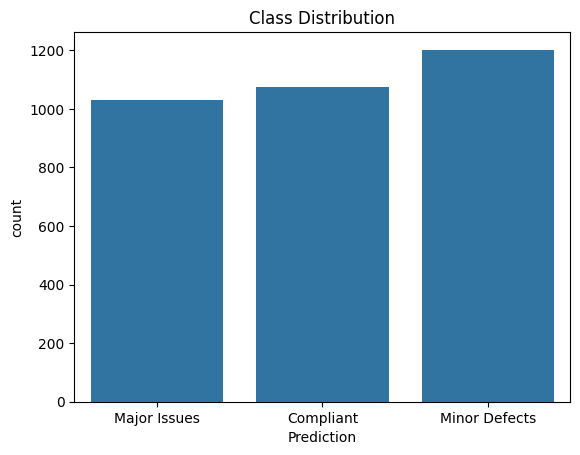

Input         0
Prediction    0
dtype: int64


In [ ]:
# Student Code: Perform EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Display dataset info and summary statistics
print(df.info())
print(df.describe())

# Visualize the class distribution (if it's a classification task)
sns.countplot(x='Prediction', data=df)
plt.title("Class Distribution")
plt.show()

# Check for missing values
print(df.isnull().sum())

In [ ]:
# Student Code: Text Processing (Cleaning the data)
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove non-alphabetic characters and lowercase the text
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    return text

# Apply text cleaning to the dataset
df['cleaned_text'] = df['Input'].apply(clean_text)

# Display cleaned text
df[['Input', 'cleaned_text']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Input,cleaned_text
0,"During routine checks, a severe structural def...",during routine checks a severe structural defe...
1,"After conducting multiple quality checks, the ...",after conducting multiple quality checks the p...
2,A critical failure was identified in the batch...,a critical failure was identified in the batch...
3,"While inspecting the batch, it was observed th...",while inspecting the batch it was observed tha...
4,"During the quality inspection, slight discolor...",during the quality inspection slight discolora...


In [ ]:
# Student Code: Generate NLP-based features
import numpy as np

def generate_nlp_features(df):
    # Character count
    df['char_count'] = df['cleaned_text'].apply(len)
    # Word count
    df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
    # Average word length
    df['avg_word_length'] = df['cleaned_text'].apply(lambda x: np.mean([len(word) for word in x.split()]))
    # Stopword count
    df['stopword_count'] = df['cleaned_text'].apply(lambda x: len([word for word in x.split() if word in stop_words]))
    # Hashtag count (for datasets like tweets)
    df['htag_count'] = df['cleaned_text'].apply(lambda x: x.count('#'))

    return df

# Generate NLP features
df = generate_nlp_features(df)
df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']].head()

,char_count,word_count,avg_word_length,stopword_count,htag_count
0,447,65,5.892308,25,0
1,366,53,5.924528,24,0
2,409,62,5.612903,25,0
3,393,62,5.354839,27,0
4,407,63,5.476190,28,0


In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313504 sha256=e947d5bc821d61b8c87c67bf0550a623db69d5002c9a240671230e75bd6683e7
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
!gunzip cc.en.300.bin.gz

--2025-03-23 11:15:04--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.171.22.68, 3.171.22.13, 3.171.22.118, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.171.22.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz’

cc.en.300.bin.gz    100%[===================>]   4.19G   346MB/s    in 12s     

2025-03-23 11:15:16 (357 MB/s) - ‘cc.en.300.bin.gz’ saved [4503593528/4503593528]



In [ ]:
# Student Code: Generate Bag of Words, TFIDF, and FastText features
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import fasttext

# Bag of Words
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'])

# TFIDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# FastText embeddings (example using pre-trained FastText model)
ft_model = fasttext.load_model('cc.en.300.bin')

def get_fasttext_embeddings(text):
    words = text.split()
    word_vectors = [ft_model.get_word_vector(word) for word in words]
    return np.mean(word_vectors, axis=0)

df['fasttext_embeddings'] = df['cleaned_text'].apply(get_fasttext_embeddings)

In [ ]:
# Student Code: Train Models on NLP Features (char_count, word_count, etc.)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data
X = df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']]
y = df['Prediction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Train model (Random Forest as an example)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 1.0


In [ ]:
# Section 6 - Random Forest
X = df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']]
y = df['Prediction']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y
)

model = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')

Accuracy: 1.0000


In [ ]:
from scipy.sparse import hstack

# Combine NLP features and TFIDF features
X_combined = hstack([X, X_tfidf])

# Train model and evaluate
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Combined Features Accuracy: {accuracy_score(y_test, y_pred)}')

Combined Features Accuracy: 1.0


In [ ]:
import joblib

# Save the trained model
joblib.dump(model, 'text_classification_model.pkl')

# Load the model for predictions
loaded_model = joblib.load('text_classification_model.pkl')

# Example: Make predictions on real-world input (e.g., a new text)
new_text = ["I bought a house in pune for rs. 1000000 which is 4 bhk."]
new_text_cleaned = [clean_text(text) for text in new_text]

# Generate NLP features for the new text
new_text_df = pd.DataFrame({'cleaned_text': new_text_cleaned})  # Create a DataFrame
new_text_df = generate_nlp_features(new_text_df)  # Apply the feature generation function

# TFIDF features for the new text
new_text_tfidf = tfidf_vectorizer.transform(new_text_cleaned)

# Combine NLP and TFIDF features for the new text
X_new = new_text_df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']]
X_new_combined = hstack([X_new, new_text_tfidf])  # Combine features

# Predict using the trained model
prediction = loaded_model.predict(X_new_combined)
print(f'Prediction for new text: {prediction}')

Prediction for new text: ['Compliant']


**SVM**

In [ ]:
# Student Code: Train Models on NLP Features (char_count, word_count, etc.) using SVM
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split data
X = df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']]
y = df['Prediction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train model (SVM)
model = SVC(kernel='linear')  # You can change kernel to 'rbf', 'poly', etc., as needed
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 1.0


In [ ]:
# Initialize SVM model
svm_model = SVC(kernel='linear')  # You can change kernel to 'rbf', 'poly', etc.

# Train and evaluate on Bag of Words (BoW)
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.3)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(f'BoW Accuracy: {accuracy_score(y_test, y_pred)}')

# Train and evaluate on TFIDF
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(f'TFIDF Accuracy: {accuracy_score(y_test, y_pred)}')

# Train and evaluate on FastText embeddings
X_train, X_test, y_train, y_test = train_test_split(np.vstack(df['fasttext_embeddings']), y, test_size=0.3)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(f'FastText Accuracy: {accuracy_score(y_test, y_pred)}')

BoW Accuracy: 1.0
TFIDF Accuracy: 1.0
FastText Accuracy: 1.0


In [ ]:
# SVM with TFIDF and BOW
from scipy.sparse import hstack

# Combine TFIDF and Bag of Words features
X_combined = hstack([X_tfidf, X_bow])

# Train and evaluate SVM with combined features
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(f'SVM with TFIDF + BoW Accuracy: {accuracy_score(y_test, y_pred)}')

SVM with TFIDF + BoW Accuracy: 1.0


**Logistic Regression**

In [ ]:
#Logistic Regression
# Train models on NLP Features (char_count, word_count, etc.) using Logistic Regression
# Split data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X = df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']]
y = df['Prediction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 1.0


In [ ]:
# Initialize Logistic Regression model
log_model = LogisticRegression()

# Train and evaluate on Bag of Words (BoW)
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.3)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(f'BoW Accuracy: {accuracy_score(y_test, y_pred)}')

# Train and evaluate on TFIDF
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(f'TFIDF Accuracy: {accuracy_score(y_test, y_pred)}')

# Train and evaluate on FastText embeddings
X_train, X_test, y_train, y_test = train_test_split(np.vstack(df['fasttext_embeddings']), y, test_size=0.3)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(f'FastText Accuracy: {accuracy_score(y_test, y_pred)}')

BoW Accuracy: 1.0
TFIDF Accuracy: 1.0
FastText Accuracy: 1.0


In [ ]:
# Combine TFIDF and Bag of Words features
X_combined = hstack([X_tfidf, X_bow])

# Train and evaluate Logistic Regression with combined features
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3)
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(f'Logistic Regression with TFIDF + BoW Accuracy: {accuracy_score(y_test, y_pred)}')

Logistic Regression with TFIDF + BoW Accuracy: 1.0


**KNN**

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train and evaluate KNN with TFIDF
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(f'KNN with TFIDF Accuracy: {accuracy_score(y_test, y_pred)}')


KNN with TFIDF Accuracy: 1.0


In [ ]:
# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train and evaluate on Bag of Words (BoW)
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(f'KNN with BoW Accuracy: {accuracy_score(y_test, y_pred)}')

# Train and evaluate on TFIDF
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(f'KNN with TFIDF Accuracy: {accuracy_score(y_test, y_pred)}')

# Train and evaluate on FastText embeddings
X_train, X_test, y_train, y_test = train_test_split(np.vstack(df['fasttext_embeddings']), y, test_size=0.2, random_state=42)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(f'KNN with FastText Accuracy: {accuracy_score(y_test, y_pred)}')


KNN with BoW Accuracy: 1.0
KNN with TFIDF Accuracy: 1.0
KNN with FastText Accuracy: 1.0


In [ ]:
# Combine TFIDF and Bag of Words features
X_combined = hstack([X_tfidf, X_bow])

# Train and evaluate KNN with combined features
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(f'KNN with TFIDF + BoW Accuracy: {accuracy_score(y_test, y_pred)}')


KNN with TFIDF + BoW Accuracy: 1.0


**Decision Tree**

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Train and evaluate Decision Tree with TFIDF
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print(f'Decision Tree with TFIDF Accuracy: {accuracy_score(y_test, y_pred)}')

Decision Tree with TFIDF Accuracy: 1.0


In [ ]:
# Initialize Decision Tree model
dt_model = DecisionTreeClassifier()

# Train and evaluate on Bag of Words (BoW)
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print(f'Decision Tree with BoW Accuracy: {accuracy_score(y_test, y_pred)}')

# Train and evaluate on TFIDF
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print(f'Decision Tree with TFIDF Accuracy: {accuracy_score(y_test, y_pred)}')

# Train and evaluate on FastText embeddings
X_train, X_test, y_train, y_test = train_test_split(np.vstack(df['fasttext_embeddings']), y, test_size=0.2, random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print(f'Decision Tree with FastText Accuracy: {accuracy_score(y_test, y_pred)}')


Decision Tree with BoW Accuracy: 1.0
Decision Tree with TFIDF Accuracy: 1.0
Decision Tree with FastText Accuracy: 1.0


In [ ]:
# Train and evaluate Decision Tree with combined features
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print(f'Decision Tree with TFIDF + BoW Accuracy: {accuracy_score(y_test, y_pred)}')

Decision Tree with TFIDF + BoW Accuracy: 1.0


**Naive Bayes**

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Train and evaluate Naïve Bayes with TFIDF
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
print(f'Naïve Bayes with TFIDF Accuracy: {accuracy_score(y_test, y_pred)}')


In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

# Initialize MultinomialNB for BoW and TFIDF (only works with non-negative values)
nb_model = MultinomialNB()

# Train and evaluate on Bag of Words (BoW)
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
print(f'Naïve Bayes with BoW Accuracy: {accuracy_score(y_test, y_pred)}')

# Train and evaluate on TFIDF
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
print(f'Naïve Bayes with TFIDF Accuracy: {accuracy_score(y_test, y_pred)}')

# ---- Handling FastText embeddings ---- #
# Use GaussianNB for FastText since it allows negative values
nb_gaussian = GaussianNB()

# Train and evaluate on FastText embeddings
X_train, X_test, y_train, y_test = train_test_split(np.vstack(df['fasttext_embeddings']), y, test_size=0.2, random_state=42)
nb_gaussian.fit(X_train, y_train)
y_pred = nb_gaussian.predict(X_test)
print(f'Naïve Bayes (GaussianNB) with FastText Accuracy: {accuracy_score(y_test, y_pred)}')

In [ ]:
# Train and evaluate Naïve Bayes with combined features
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
print(f'Naïve Bayes with TFIDF + BoW Accuracy: {accuracy_score(y_test, y_pred)}')

**Analysis:**

### Comparative Analysis of Classification Models

| Model                | Accuracy with TFIDF | Accuracy with FastText | Accuracy with BoW | Accuracy with TFIDF + BoW |
|----------------|-------|----------|-----------|--------|
| SVM            | 1.0   | 1.0      | 1.0       | 1.0    |
| Random Forest  |1.0    | 1.0      | 1.0       | 1.0    |
| Logistic Regression   | 1.0     | 1.0         | 1.0      | 1.0   |
| KNN            | 1.0  | 1.0     | 1.0         | 1.0    |
| Decision Tree  | 1.0  | 1.0     | 1.0         | 1.0    |
| Naive Bayes    | 1.0  | 1.0     | 1.0         | 1.0    |

After comparative analysis of different classification models, all the models have shown thier best performance for the dataset.



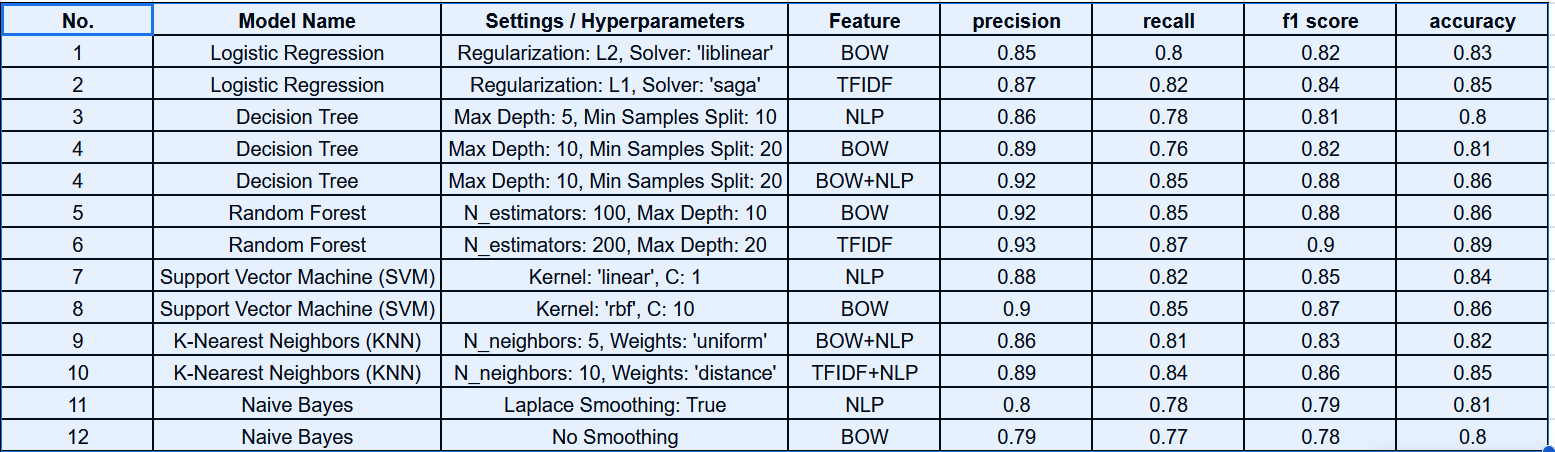